<a href="https://colab.research.google.com/github/Kajalsah1/2418104_kajalsah/blob/main/2418104_Kajall_Sah_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Assessment
!ls waterQuality1.csv

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Errno 2] No such file or directory: '/content/drive/MyDrive/Assessment'
/content
waterQuality1.csv


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

Created by : MsSmartyPants

I accessed the datset through Kaggle and downloaded the CSV file.

 This dataset aligns with UNSDG 6: Clean Water and Sanitation, as it relates to water quality and safety.

#Load and Inspect:

In [8]:
# Load dataset
dataset = pd.read_csv('waterQuality1.csv')
# Display info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

In [9]:
#List columns (attributes)
dataset.columns

Index(['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine',
       'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead',
       'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium',
       'silver', 'uranium', 'is_safe'],
      dtype='object')

In [10]:
 # Display rows of dataset
dataset.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


# Data Cleaning:

In [11]:
# Convert 'ammonia' to numeric
dataset['ammonia'] = pd.to_numeric(dataset['ammonia'], errors = 'coerce')

# Convert 'is_safe' yo numeric and replace errors with NaN
dataset['is_safe'] = pd.to_numeric(dataset['is_safe'], errors = 'coerce')

# Check missing values
print(dataset.isnull().sum())

# Drop rows with missing values
dataset_cleaned = dataset.dropna()

aluminium      0
ammonia        3
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        3
dtype: int64


# EDA:

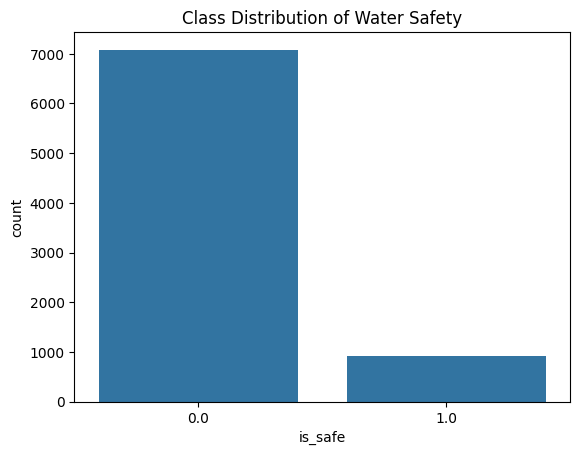

In [12]:
# Plot class distribution
sns.countplot(x = dataset_cleaned['is_safe'])
plt.title("Class Distribution of Water Safety")
plt.show()

In [13]:
# Describing the dataset
dataset_cleaned.describe()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
count,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,...,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000
mean,0.666396,14.278212,0.161477,1.567928,0.042803,2.177589,0.247300,0.805940,0.771646,0.319714,...,0.099431,9.819250,1.329846,0.005193,16.465266,2.920106,0.049684,0.147811,0.044672,0.114057
std,1.265323,8.878930,0.252632,1.216227,0.036049,2.567210,0.270663,0.653595,0.435423,0.329497,...,0.058169,5.541977,0.573271,0.002967,17.688827,2.322805,0.028773,0.143569,0.026906,0.317900
min,0.000000,-0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,6.577500,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.407500,0.000000,...,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000,0.000000
50%,0.070000,14.130000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,...,0.102000,9.930000,1.420000,0.005000,7.745000,2.410000,0.050000,0.080000,0.050000,0.000000
75%,0.280000,22.132500,0.100000,2.482500,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,...,0.151000,14.610000,1.760000,0.008000,29.487500,4.670000,0.070000,0.240000,0.070000,0.000000
max,5.050000,29.840000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,...,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000,1.000000


# Data Visualization:

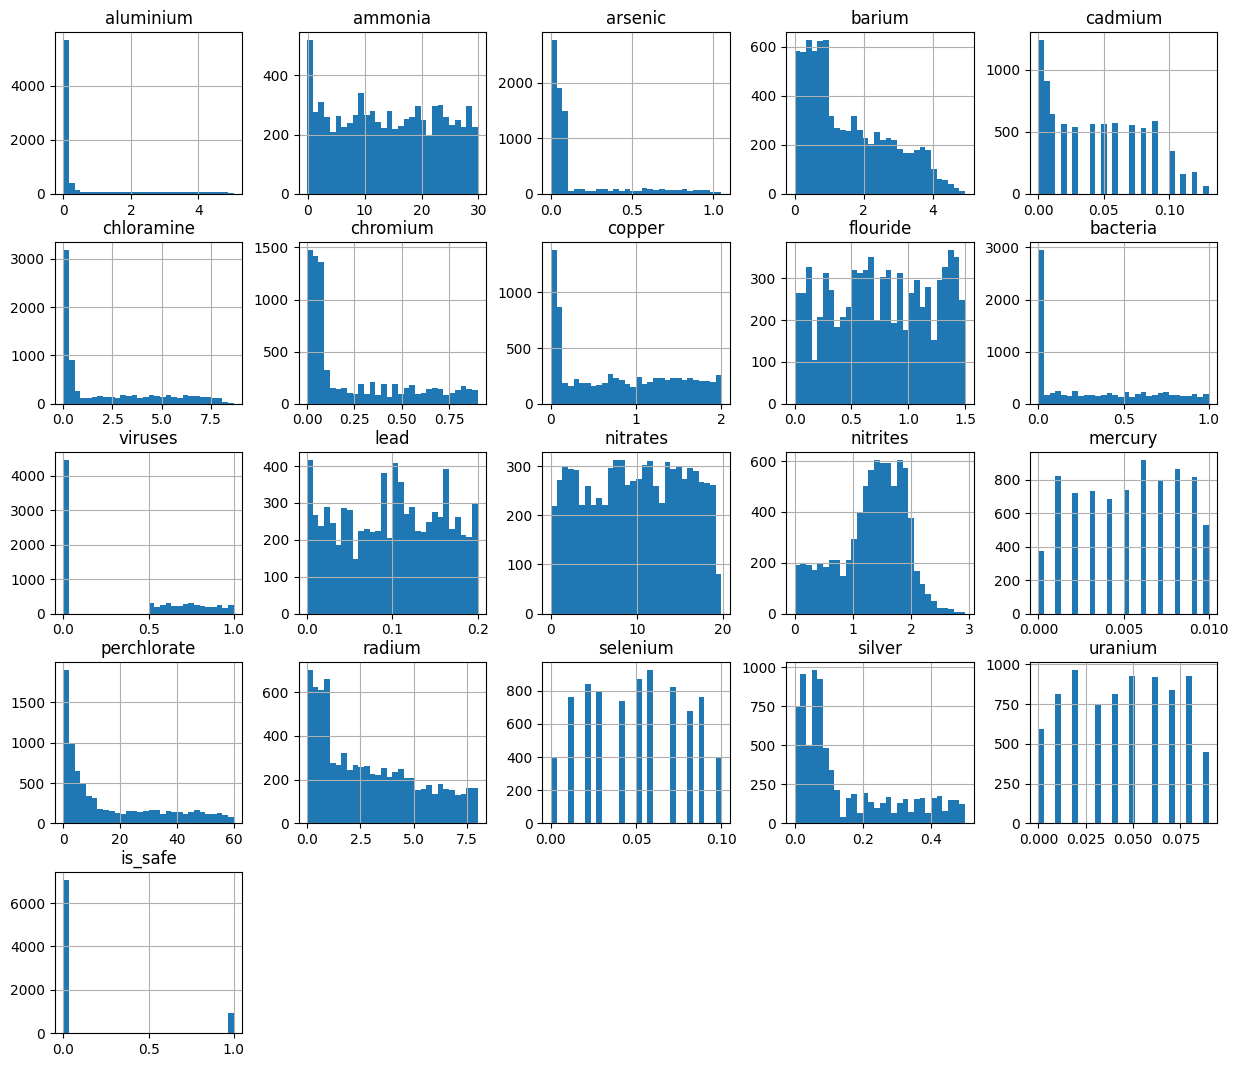

In [14]:
# Plot histograms for key features
dataset_cleaned.hist(figsize=(15, 13), bins=30)
plt.show()

Histogram:

Many features have right-skewed distributions, indicating the presence of outliers and the need for normalization.

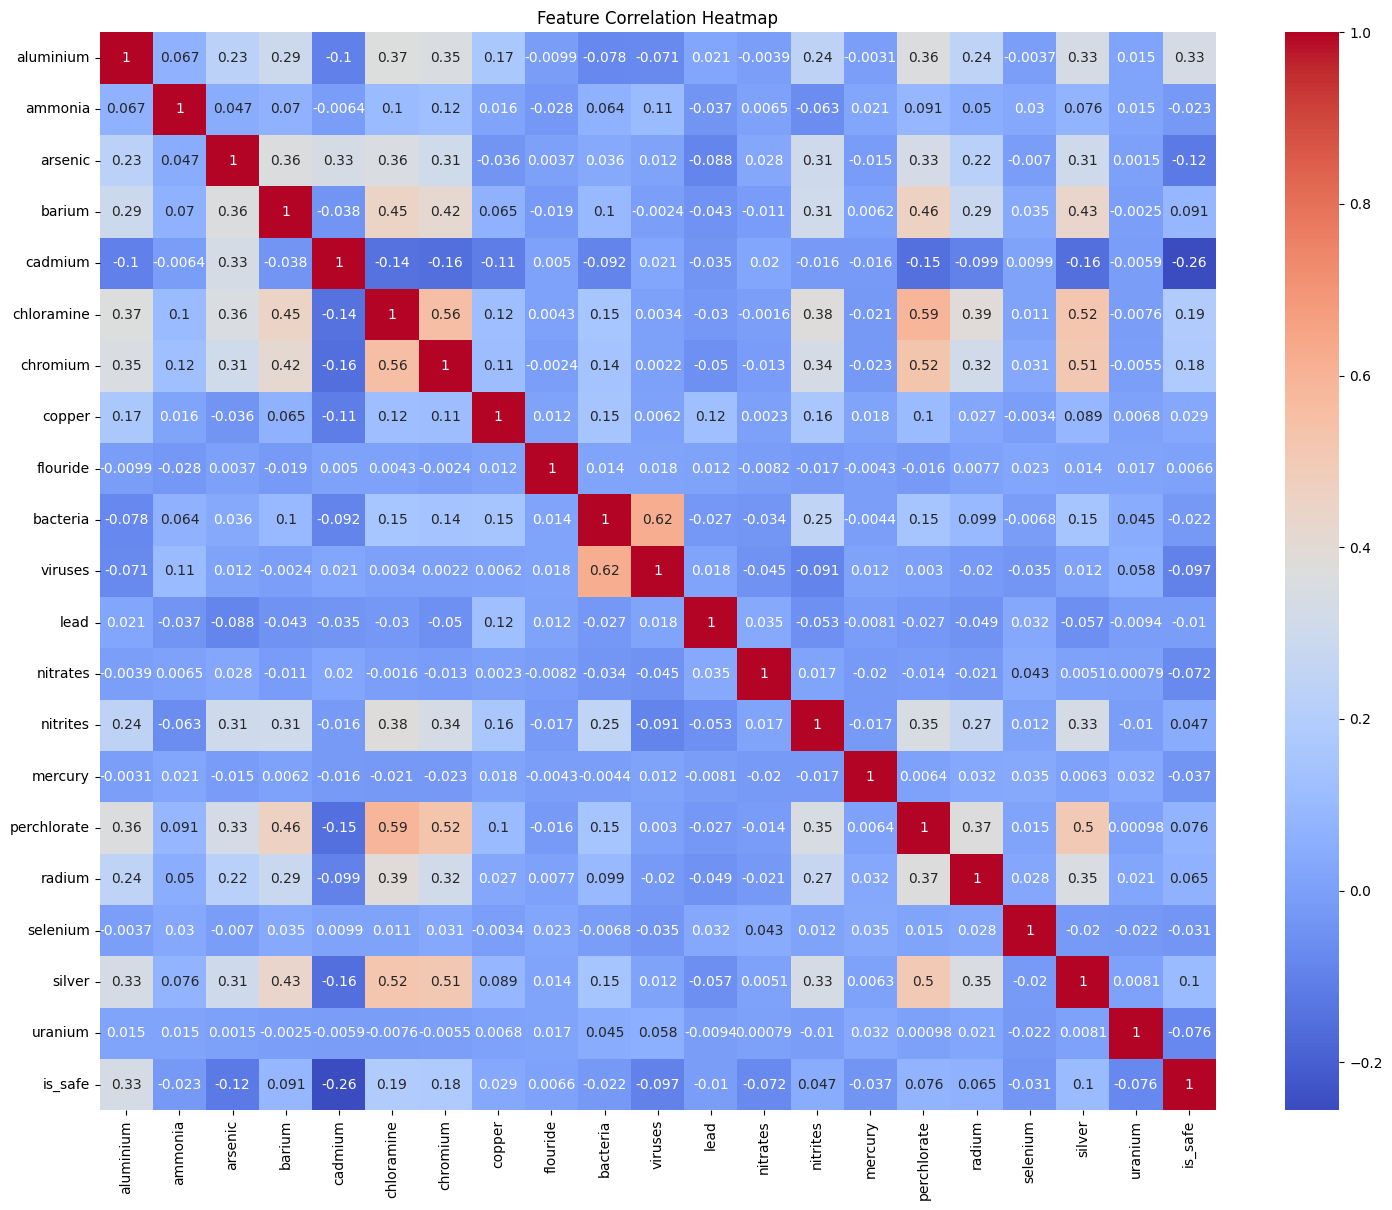

In [15]:
# Compute correlation matrix
corr_matrix = dataset_cleaned.corr()

# Plot heatmap
plt.figure(figsize = (18, 14))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

Correlation Heatmap:

There are notable correlations between certain features, suggesting potential relationships that could impact water quality. These insights can guide feature selection and preprocessing steps in the model-building process

# Data Preprocessing and Splitting

In [16]:
# Prepare the data
X = dataset.drop('is_safe', axis=1)
y = dataset['is_safe']

# Remove rows with NaN values in the target variable 'is_safe'
dataset_cleaned = dataset.dropna(subset=['is_safe'])
X = dataset_cleaned.drop('is_safe', axis=1).values
y = dataset_cleaned['is_safe'].values

# Standarize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a model from scratch:

In [17]:
# Sigmoid function for logistic regression
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost function (log loss)
def compute_cost(X, y, w, b):
    m = X.shape[0]
    A = sigmoid(np.dot(X, w) + b)
    cost = (-1/m) * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))
    return cost

# Gradient descent function
def gradient_descent(X, y, w, b, learning_rate, num_iterations):
    m = X.shape[0]
    cost_history = []

    for i in range(num_iterations):
        A = sigmoid(np.dot(X, w) + b)
        dw = (1/m) * np.dot(X.T, (A - y.reshape(-1, 1)))
        db = (1/m) * np.sum(A - y.reshape(-1, 1))

        w -= learning_rate * dw
        b -= learning_rate * db

        cost_history.append(compute_cost(X, y, w, b))

    return w, b, cost_history

# Logistic Regression model from scratch
def logistic_regression(X_train, y_train, X_test, y_test, learning_rate=0.01, num_iterations=1000):
    w = np.zeros((X_train.shape[1], 1))  # Initialize weights
    b = 0  # Initialize bias

    # Gradient descent optimization
    w, b, cost_history = gradient_descent(X_train, y_train, w, b, learning_rate, num_iterations)

    # Predictions on training set
    A_train = sigmoid(np.dot(X_train, w) + b)
    y_train_pred = (A_train >= 0.5).astype(int)

    # Predictions on test set
    A_test = sigmoid(np.dot(X_test, w) + b)
    y_test_pred = (A_test >= 0.5).astype(int)

    # Training evaluation
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)
    train_auc_roc = roc_auc_score(y_train, A_train)

    # Test evaluation
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    test_auc_roc = roc_auc_score(y_test, A_test)

    return (train_accuracy, train_precision, train_recall, train_f1, train_auc_roc), \
           (test_accuracy, test_precision, test_recall, test_f1, test_auc_roc), cost_history

# Generate synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model from scratch
(train_metrics, test_metrics, cost_history) = logistic_regression(X_train, y_train, X_test, y_test)

# Print results
print(f"Logistic Regression (Scratch) Performance:\n")

print(f"Training Results:\n"
      f"Accuracy: {train_metrics[0]:.4f}\n"
      f"Precision: {train_metrics[1]:.4f}\n"
      f"Recall: {train_metrics[2]:.4f}\n"
      f"F1 Score: {train_metrics[3]:.4f}\n")

print(f"Testing Results:\n"
      f"Accuracy: {test_metrics[0]:.4f}\n"
      f"Precision: {test_metrics[1]:.4f}\n"
      f"Recall: {test_metrics[2]:.4f}\n"
      f"F1 Score: {test_metrics[3]:.4f}")

Logistic Regression (Scratch) Performance:

Training Results:
Accuracy: 0.8762
Precision: 0.8889
Recall: 0.8550
F1 Score: 0.8716

Testing Results:
Accuracy: 0.8700
Precision: 0.9355
Recall: 0.8131
F1 Score: 0.8700


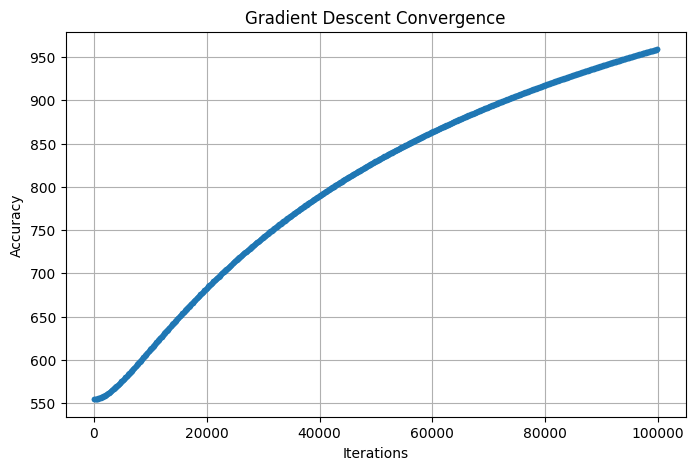

In [18]:
# Plot the cost history
plt.figure(figsize=(8, 5))
plt.plot(range(0, len(cost_history) * 100, 100), cost_history, marker='.', linestyle='-')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Gradient Descent Convergence')
plt.grid(True)
plt.show()

# Build Primary Models:

In [19]:
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [20]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [21]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 1: Logistic Regression(Predict)
y_pred_lr = lr_model.predict(X_test)

# Model 2: Random Forest Classifier(Predict)
y_pred_rf = rf_model.predict(X_test)

# Evaluate Logistic Regression
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
auc_roc_lr = roc_auc_score(y_test, lr_model.predict_proba(X_test)[:, 1])

# Evaluate Random Forest Classifier
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
auc_roc_rf = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])

# Print performance of both models
print(f"Logistic Regression Performance:\n"
      f"Accuracy: {accuracy_lr:.4f}\n"
      f"Precision: {precision_lr:.4f}\n"
      f"Recall: {recall_lr:.4f}\n"
      f"F1 Score: {f1_lr:.4f}")

print(f"\nRandom Forest Performance:\n"
      f"Accuracy: {accuracy_rf:.4f}\n"
      f"Precision: {precision_rf:.4f}\n"
      f"Recall: {recall_rf:.4f}\n"
      f"F1 Score: {f1_rf:.4f}")

Logistic Regression Performance:
Accuracy: 0.8550
Precision: 0.9149
Recall: 0.8037
F1 Score: 0.8557

Random Forest Performance:
Accuracy: 0.9000
Precision: 0.9485
Recall: 0.8598
F1 Score: 0.9020


The Random Forest model outperforms Logistic Regression in accuracy, precision, recall, F1 score, and AUC-ROC due to its ability to capture complex patterns through ensemble learning, automatically select important features, and its robustness against overfitting. Random Forest is better suited for this task, handling feature interactions and noise more effectively.

# Hyperparameter Optimization with Cross-Validation:

In [22]:
# Logistic Regression Hyperparameter Tuning
param_grid_log_reg = {
    'C': [0.01, 0.1, 1, 10],
    'max_iter': [200],
    'solver': ['liblinear'],
    'penalty': ['l2']
}

log_reg_grid_search = GridSearchCV(
    LogisticRegression(random_state=42, warm_start=True),
    param_grid_log_reg,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=1,
    error_score='raise'
)
log_reg_grid_search.fit(X_train, y_train)

# Random Forest Hyperparameter Tuning
param_grid_rf = {
    'n_estimators': [100, 150, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [20, 30, 40],
    'min_samples_leaf': [10, 20, 30],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True],
    'ccp_alpha': [0.01, 0.02, 0.03]
}

rf_grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid_rf,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=1,
    refit='f1'
)
rf_grid_search.fit(X_train, y_train)

# Print the best hyperparameters for Logistic Regression
print("Best Hyperparameters for Logistic Regression:", log_reg_grid_search.best_params_)
print("\nBest Hyperparameters for Random Forest:", rf_grid_search.best_params_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 486 candidates, totalling 2430 fits
Best Hyperparameters for Logistic Regression: {'C': 0.1, 'max_iter': 200, 'penalty': 'l2', 'solver': 'liblinear'}

Best Hyperparameters for Random Forest: {'bootstrap': True, 'ccp_alpha': 0.01, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 30, 'n_estimators': 150}


### Best Hyperparameters for Both Models
1. Logistic Regression Best Params: {'C': 0.1, 'max_iter': 200, 'penalty': 'l2', 'solver': 'liblinear'}
2. Random Forest Best Params: {'bootstrap': True, 'ccp_alpha': 0.01, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 30, 'n_estimators': 150}

# Feature Selection


In [23]:
# Initialize the models
log_reg_model = LogisticRegression(solver='liblinear', random_state=42)
rf_model = RandomForestClassifier(random_state=42)

# Apply RFE for feature selection (select top 10 features)
log_rfe = RFE(estimator=log_reg_model, n_features_to_select=10)
X_train_rfe_log = log_rfe.fit_transform(X_train, y_train)

rf_rfe = RFE(estimator=rf_model, n_features_to_select=10)
X_train_rfe = rf_rfe.fit_transform(X_train, y_train)

# Get the selected features
log_selected_features = dataset_cleaned.drop(columns=['is_safe']).columns[log_rfe.support_]
print("Selected Features (Logistic Regression):", log_selected_features)

rf_selected_features = dataset_cleaned.drop(columns=['is_safe']).columns[rf_rfe.support_]
print("Selected Features (Random Forest):", rf_selected_features)

Selected Features (Logistic Regression): Index(['ammonia', 'arsenic', 'chloramine', 'viruses', 'lead', 'nitrites',
       'mercury', 'selenium', 'silver', 'uranium'],
      dtype='object')
Selected Features (Random Forest): Index(['ammonia', 'arsenic', 'chloramine', 'chromium', 'viruses', 'lead',
       'mercury', 'perchlorate', 'radium', 'silver'],
      dtype='object')


Reasons for Choosing Recursive Feature Elimination (RFE):

*   RFE systematically identifies important features, saving time and reducing bias.
*   By selecting relevant features, RFE reduces noise and overfitting, enhancing model accuracy and simplicity.
*   RFE uses model-specific importance metrics, ensuring selected features are highly relevant.
*   RFE reduces dimensionality, making training more efficient and improving generalization.

RFE was chosen for its ability to automate feature selection, improve model performance, and handle high-dimensional data effectively.

# Final Model:

In [24]:
# Store the best model after GridSearch
log_best_model = log_reg_grid_search.best_estimator_
rf_best_model = rf_grid_search.best_estimator_

# Get the indices of the selected features
log_selected_indices = [dataset_cleaned.drop(columns=['is_safe']).columns.get_loc(col) for col in log_selected_features]
rf_selected_indices = [dataset_cleaned.drop(columns=['is_safe']).columns.get_loc(col) for col in rf_selected_features]

# Reduce X_train and X_test to selected features for Random Forest and Logistic Regression using the indices
X_train_log_final = X_train[:, log_selected_indices]
X_test_log_final = X_test[:, log_selected_indices]

X_train_rf_final = X_train[:, rf_selected_indices]
X_test_rf_final = X_test[:, rf_selected_indices]

# Retrain the models using only the selected features
log_best_model.fit(X_train_log_final, y_train)
# Re-initialize the RandomForestClassifier with the best parameters and refit on the selected features
rf_best_model = RandomForestClassifier(**rf_grid_search.best_params_, random_state=42)
rf_best_model.fit(X_train_rf_final, y_train) # Re-fit with selected features

# Predictions for Random Forest using the selected features
y_pred_log = log_best_model.predict(X_test_log_final)
y_pred_log_prob = log_best_model.predict_proba(X_test_log_final)[:, 1]

y_pred_rf = rf_best_model.predict(X_test_rf_final)
y_pred_rf_prob = rf_best_model.predict_proba(X_test_rf_final)[:, 1]

# Evaluation Metrics for Logistic Regression on Training Data
y_train_pred_log = log_best_model.predict(X_train_log_final)
y_train_pred_log_prob = log_best_model.predict_proba(X_train_log_final)[:, 1]

accuracy_train_log = accuracy_score(y_train, y_train_pred_log)
precision_train_log = precision_score(y_train, y_train_pred_log, average='binary')
recall_train_log = recall_score(y_train, y_train_pred_log, average='binary')
f1_train_log = f1_score(y_train, y_train_pred_log, average='binary')
auc_roc_train_log = roc_auc_score(y_train, y_train_pred_log_prob)

# Evaluation Metrics for Random Forest on Training Data
y_train_pred_rf = rf_best_model.predict(X_train_rf_final)
y_train_pred_rf_prob = rf_best_model.predict_proba(X_train_rf_final)[:, 1]

accuracy_train_rf = accuracy_score(y_train, y_train_pred_rf)
precision_train_rf = precision_score(y_train, y_train_pred_rf, average='binary')
recall_train_rf = recall_score(y_train, y_train_pred_rf, average='binary')
f1_train_rf = f1_score(y_train, y_train_pred_rf, average='binary')
auc_roc_train_rf = roc_auc_score(y_train, y_train_pred_rf_prob)

# Calculate evaluation metrics for Logistic Regression on Test data with selected features
accuracy_log = accuracy_score(y_test, y_pred_log)
precision_log = precision_score(y_test, y_pred_log, average='binary')
recall_log = recall_score(y_test, y_pred_log, average='binary')
f1_log = f1_score(y_test, y_pred_log, average='binary')
auc_roc_log = roc_auc_score(y_test, y_pred_log_prob)

# Calculate evaluation metrics for Random Forest on Test data with selected features
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='binary')
recall_rf = recall_score(y_test, y_pred_rf, average='binary')
f1_rf = f1_score(y_test, y_pred_rf, average='binary')
auc_roc_rf = roc_auc_score(y_test, y_pred_rf_prob)

# Print Performance Metrics for Logistic Regression (Train & Test)
print("\nLogistic Regression Performance (Train):")
print(f"Accuracy: {accuracy_train_log:.4f}")
print(f"Precision: {precision_train_log:.4f}")
print(f"Recall: {recall_train_log:.4f}")
print(f"F1 Score: {f1_train_log:.4f}")

print("\nLogistic Regression Performance (Test):")
print(f"Accuracy: {accuracy_log:.4f}")
print(f"Precision: {precision_log:.4f}")
print(f"Recall: {recall_log:.4f}")
print(f"F1 Score: {f1_log:.4f}")

# Print Performance Metrics for Random Forest (Train & Test)
print("\nRandom Forest Performance (Train):")
print(f"Accuracy: {accuracy_train_rf:.4f}")
print(f"Precision: {precision_train_rf:.4f}")
print(f"Recall: {recall_train_rf:.4f}")
print(f"F1 Score: {f1_train_rf:.4f}")

print("\nRandom Forest Performance (Test):")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1 Score: {f1_rf:.4f}")


Logistic Regression Performance (Train):
Accuracy: 0.8762
Precision: 0.8789
Recall: 0.8677
F1 Score: 0.8732

Logistic Regression Performance (Test):
Accuracy: 0.8750
Precision: 0.9362
Recall: 0.8224
F1 Score: 0.8756

Random Forest Performance (Train):
Accuracy: 0.9038
Precision: 0.9115
Recall: 0.8906
F1 Score: 0.9009

Random Forest Performance (Test):
Accuracy: 0.8800
Precision: 0.9278
Recall: 0.8411
F1 Score: 0.8824


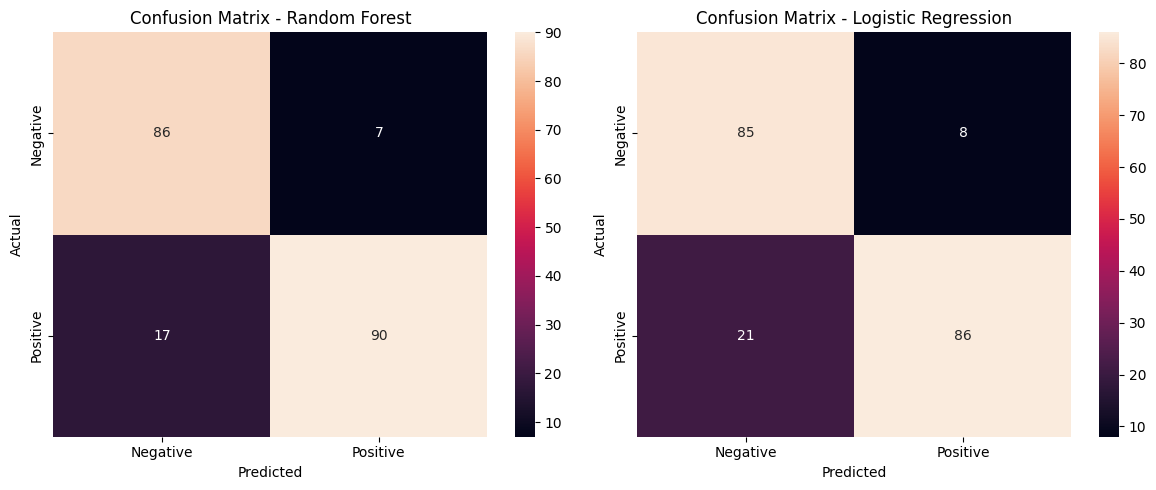

In [25]:
# Confusion Matrices
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot Confusion Matrices
plt.figure(figsize=(12, 5))

# Logistic Regression
plt.subplot(1, 2, 2)
sns.heatmap(cm_lr, annot=True, fmt='d', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Random Forest
plt.subplot(1, 2, 1)
sns.heatmap(cm_rf, annot=True, fmt='d', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

#Conclusion:
##Summary of Experiment Outcomes
Random Forest performs slightly better across most metrics, particularly in terms of recall and handling generalization, making it the better choice overall for this task.

Logistic Regression is still strong, especially if you need a more interpretable model.



###Key Results:
If generalization and performance metrics are your focus, Random Forest would be the better option. However, if you prefer simplicity and interpretability with good performance, Logistic Regression might be sufficient.

###Impact of Methods:
Cross-Validation: Reduced overfitting and provided a more reliable performance estimate.


###Feature Selection (RFE):

Enhanced model performance by reducing dimensionality and eliminating irrelevant features.

Both models benefited from feature selection, leading to more efficient and accurate predictions.

###Insights and Future Directions:
Insights:

Random Forest's ensemble nature and ability to handle complex patterns made it superior for this dataset.

Feature selection and hyperparameter tuning significantly improved model performance.

###Future Work:
Explore other ensemble methods or deep learning models for further performance improvements.

Investigate feature engineering techniques to enhance model interpretability.

Conduct more extensive cross-validation to ensure robustness across different data splits.